# 1. LBP(local binary pattern)  

- 이미지의 미세한 질감(micro-texture)을 표현하는 데 효과적인 연산자  

<pr>

- 생성 방법  
  <img src='rc/lbp.png' alt='lbp' width="640" heigh="480">  
  
  - 1) 중심 픽셀과 각 이웃 픽셀 값을 비교 (시계/반시계 방향으로)
  - 2) 해당 이웃 픽셀이 중심 픽셀보다 크면 1, 아니면 0을 할당 => 이진 수열(e.g., 10011010)이 생성됨
  - 3) 이미지 전체에 대한 LBP 히스토그램 계산
  - 4) 계산된 히스토그램을 해당 이미지에 대한 특징 벡터(feature vector)로 사용  
    - 예) p=8인 경우: 256 차원의 특징 벡터

<pr>
    
- 공간에서의 위치 정보도 유지하면서 질감 정보를 표현하고 싶다면?

  <img src='rc/face_lbp.png' alt='lbp' width="720" heigh="480">  

  - 이미지를 N개의 하위 영역으로 분할한 후
  - 각 하위 영역에 대한 LBP 히스토그램 계산
  - 각 히스토그램을 순서대로 이어붙여서 하나의 특징 벡터로 만듦
    - 예) p=8인 경우: N×256 길이의 특징 벡터가 생성됨

<pr>
    
- 특징  
  - 이웃 화소 간 상대적인 명암 차이를 사용하므로 조명 변화에 불변인 특성을 가짐


#### [Reference]
- [link #1 - blog](https://towardsdatascience.com/face-recognition-how-lbph-works-90ec258c3d6b)  
- [link #2 - blog](https://bskyvision.com/280)

# 2. Practice  
- scikit-image에서 제공하는 LBP 특징 검출기 사용  
  - pip install scikit-image  
  
## 1) LBP 적용해보기

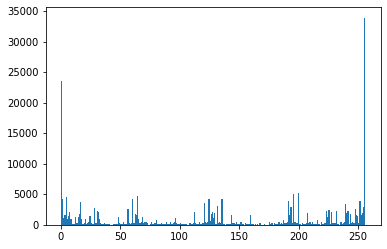

In [1]:
import cv2
import numpy as np
from skimage.feature import local_binary_pattern
import matplotlib.pyplot as plt
%matplotlib inline

## LBP 파라미터
radius = 1
numPoints = 8 * radius
method = 'default'

## 이미지 불러오기
img = cv2.imread('iu.jpg')
img = cv2.resize(img, None, fx=0.4, fy=0.4)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

## LBP 계산
lbp = local_binary_pattern(gray, numPoints, radius, method)
lbp = lbp.astype('uint8')

## LBP 히스토그램 시각화
n_bins = lbp.max() + 1

plt.hist(lbp.ravel(), bins=n_bins, range=(0,n_bins))
plt.show()

## 이미지 시각화 
cv2.imshow('gray', gray)
cv2.imshow('lbp', lbp)
cv2.waitKey(0)

cv2.destroyAllWindows()

#### ※ 이미지 경계 부분은 어떻게 처리될까?

In [2]:
print(">> shape of gray image {}".format(gray.shape))
print(gray)
print()

print(">> shape of lbp image {}".format(lbp.shape))
print(lbp)

>> shape of gray image (551, 432)
[[103 104 102 ... 123 122 121]
 [102 100 101 ... 121 117 121]
 [101 105 102 ... 122 118 121]
 ...
 [ 21  20  19 ...  13  11  17]
 [ 20  22  20 ...  16  19  12]
 [ 22  24  22 ...  18  21  18]]

>> shape of lbp image (551, 432)
[[  1   0  16 ...   0  16  80]
 [134 255 238 ... 126 255  68]
 [199   0 241 ... 120 251  68]
 ...
 [132 252 255 ... 220 255   0]
 [199  64 250 ... 225  64 124]
 [  3   0  25 ...  19   0  16]]


In [ ]:
'''
scikit-learn에서 제공하는 LBP 연산자는 내부적으로 제로 패딩(zero-padding) 기법을 사용함

[[  0   0   0   0 ...   0   0   0   0]
 [  0 103 104 102 ... 123 122 121   0]
 [  0 102 100 101 ... 121 117 121   0]
 [  0 101 105 102 ... 122 118 121   0]
 ...
 [  0  21  20  19 ...  13  11  17   0]
 [  0  20  22  20 ...  16  19  12   0]
 [  0  22  24  22 ...  18  21  18   0]
 [  0   0   0   0 ...   0   0   0   0]]

'''

## 2) 조명 변화에 불변인 특성 확인하기

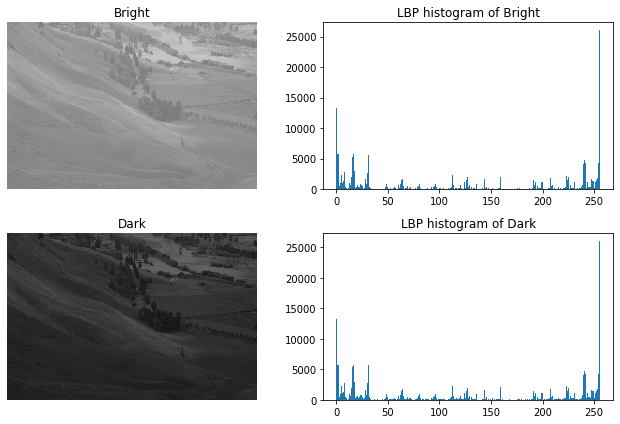

In [3]:
import cv2
import numpy as np
from skimage.feature import local_binary_pattern
import matplotlib.pyplot as plt
%matplotlib inline

## LBP 파라미터
radius = 1
numPoints = 8 * radius
method = 'default'

## 이미지 불러오기
img1 = cv2.imread('landscape.jpg')
img1 = cv2.resize(img1, None, fx=0.5, fy=0.5)
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

## 어두운 이미지 생성
gray2 = gray1.copy()
gray2 = gray2 - 100

## LBP 계산
lbp1 = local_binary_pattern(gray1, numPoints, radius, method)
lbp2 = local_binary_pattern(gray2, numPoints, radius, method)

## 결과 시각화
n_bins = int(lbp1.max()) + 1
plt.figure(figsize=(9, 6))

plt.subplot(2,2,1)
plt.imshow(gray1, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title('Bright')

plt.subplot(2,2,2)
plt.hist(lbp1.ravel(), bins=n_bins, range=(0,n_bins))
plt.title('LBP histogram of Bright')

plt.subplot(2,2,3)
plt.imshow(gray2, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title('Dark')

plt.subplot(2,2,4)
plt.hist(lbp2.ravel(), bins=n_bins, range=(0,n_bins))
plt.title('LBP histogram of Dark')

plt.tight_layout()
plt.show()

## 3) 개선된 LBP 기술자들
#### a. 패턴 00000001과 패턴 10000000은 서로 다르다고 봐야할까?
- 회전 불변(rotation-invariant) LBP  
<img src='rc/rotation_invariant.png' alt='lbp' width="480" heigh="360">  

#### b. 분별력 없는 패턴들을 하나로 합치면 특징을 더 단순화할 수 있지 않을까?
- uniform LBP  
  - uniform 패턴: 0 -> 1 또는 1 -> 0의 전이가 3번 미만인 비트열 
    - 예) 11111111(0번 전이), 00000111(1번 전이), 00111000(2번 전이)  
 
  <br>
 
  - non-uniform 패턴: 전이가 3번 이상인 패턴(단일 패턴으로 취급)  
    - 예) 00011011(3번 전이), 10110011(4번 전이), 01010111(5번 전이)  
    
#### c. rotation-invariant + uniform LBP
 - 적은 개수의 패턴만으로 효과적으로 질감 표현  

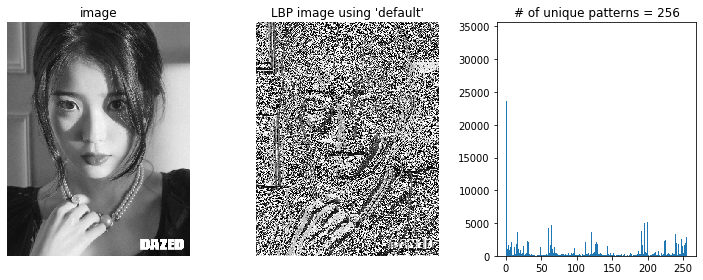

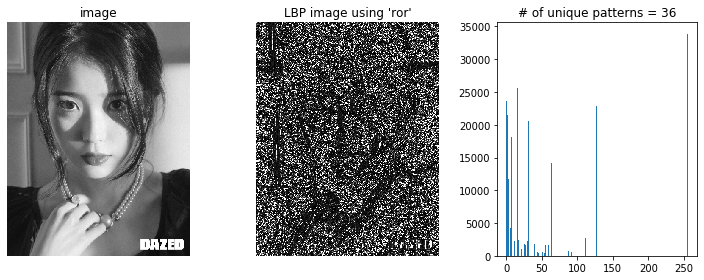

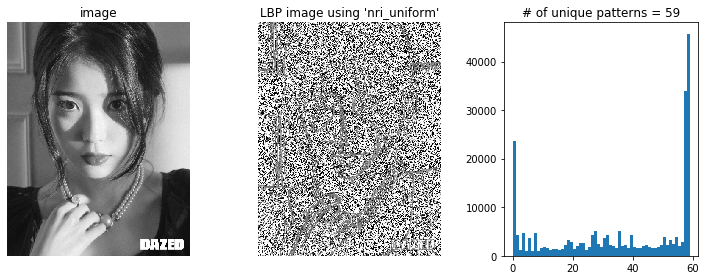

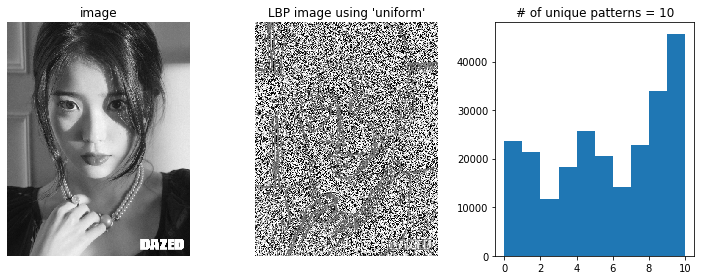

In [5]:
import cv2
import numpy as np
from skimage.feature import local_binary_pattern
import matplotlib.pyplot as plt
%matplotlib inline

## LBP 파라미터
radius = 1
numPoints = 8 * radius

## 이미지 불러오기
img = cv2.imread('iu.jpg')
img = cv2.resize(img, None, fx=0.4, fy=0.4)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

## 각 LBP 방식 비교
## https://scikit-image.org/docs/dev/api/skimage.feature.html?highlight=lbp#local-binary-pattern
for method in ['default', 'ror', 'nri_uniform', 'uniform']:
    ## LBP 계산
    lbp = local_binary_pattern(gray, numPoints, radius, method)
    lbp = lbp.astype('uint8')

    ## 결과 시각화
    n_bins = lbp.max() + 1
    plt.figure(figsize=(10,4))
    
    plt.subplot(1,3,1)
    plt.imshow(gray, cmap='gray')
    plt.axis('off')
    plt.title('image')
    plt.subplot(1,3,2)
    plt.imshow(lbp, cmap='gray')
    plt.axis('off')
    plt.title("LBP image using '{}'".format(method))
    plt.subplot(1,3,3)
    plt.hist(lbp.ravel(), bins=n_bins, range=(0,n_bins))
    plt.title("# of unique patterns = {}".format(len(np.unique(lbp))))
    
    plt.tight_layout()
    plt.show()

## 4) Homework ( ~ 11/18 12:00)

In [4]:
import numpy as np

def solution(img):
    """
    3×3 이미지를 입력 받아 '가운데 픽셀' 관점에서
    1개의 LBP 패턴을 생성한 후 
    패턴의 값을 10진수 값으로 반환해주는 함수 작성
    
    <조건 1>
    패턴 생성 순서 = [4 3 2
                      5 - 1
                      6 7 8]    
    
    비트열 자리:    2^7   2^6   2^5   2^4   2^3   2^2   2^1   2^0
    패턴 순서:       8     7     6     5     4     3     2     1
     
     
    <조건 2>
    if neighbor_pixel > center:
        1
    else:
        0
    """   


In [5]:
## test case 1
img1 = np.array([[ 30,  26,  34],
                 [ 21,  26,  28],
                 [ 23,  22,  35]])
out1 = solution(img1)
print(out1)

## test case 2
img2 = np.array([[21, 20, 19],
                 [20, 22, 20],
                 [22, 24, 22]])
out2 = solution(img2)
print(out2)

139
64
